<a href="https://colab.research.google.com/github/LUCASSIMA270/BIG_data/blob/main/Copie_de_LUCAS_SIMATOVIC_L3_EF_TD2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#On importe tous les "import" dont on aura besoin pour ce TD

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
#Premièrement, on génère des données aléatoires en utilisant la fonction "make_classification" dans les X et Y train et test
#Afin de constituer les ensembles Xtrain et Xtest

X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Par défaut X_train est composé à 70% vu que les données de test sont à 30%

#On crée les objets gmm_diag et gmm_full avec leurs diagonales diagonales et pleines respectivement
#Et on détermine aussi le nombre de classes

n_classes = len(np.unique(y_train))
gmm_diag = GaussianMixture(n_components=n_classes, covariance_type='diag')
gmm_full = GaussianMixture(n_components=n_classes, covariance_type='full')

#On peut alors lancer les deux apprentissages avec les fonctions gmm_diag.fit et gmm_full.fit sur les données X_train

gmm_diag.fit(X_train)
gmm_full.fit(X_train)

GaussianMixture(n_components=3)

In [ ]:
#De là, nous pouvons prédire les étiquettes pour X_test avec y_test_pred et X_train avec y_train_pred
#On le fait pour les covariances diagonales et les pleines

y_train_pred_diag = gmm_diag.predict(X_train)
y_test_pred_diag = gmm_diag.predict(X_test)

y_train_pred_full = gmm_full.predict(X_train)
y_test_pred_full = gmm_full.predict(X_test)

In [ ]:
#On calcul le taux de bonne assignation par rapport à la classification à la fois pour les covariances diagonales et les pleines pour chaque test ou train

train_accuracy_diag = np.mean(y_train_pred_diag.ravel() == y_train.ravel()) * 100
test_accuracy_diag = np.mean(y_test_pred_diag.ravel() == y_test.ravel()) * 100

train_accuracy_full = np.mean(y_train_pred_full.ravel() == y_train.ravel()) * 100
test_accuracy_full = np.mean(y_test_pred_full.ravel() == y_test.ravel()) * 100

print(train_accuracy_diag)
print(test_accuracy_diag)
print(train_accuracy_full)
print(test_accuracy_full)

20.714285714285715
20.666666666666668
2.0
2.0


In [ ]:
#On crée deux vecteurs x et y avec leurs intervalles [a, b]/[c, d] discrédités en 200 points

vectx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)
vecty = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200)

#On crée ensuite les deux grilles xx et yy, ensuite on déplie ces grilles pour obtenir un vecteur

xx, yy = np.meshgrid(vectx, vecty)
grille = np.c_[xx.ravel(), yy.ravel()]

#On prédit les sorties des deux modèles

z_diag = gmm_diag.predict(grille).reshape(xx.shape)
z_full = gmm_full.predict(grille).reshape(xx.shape)

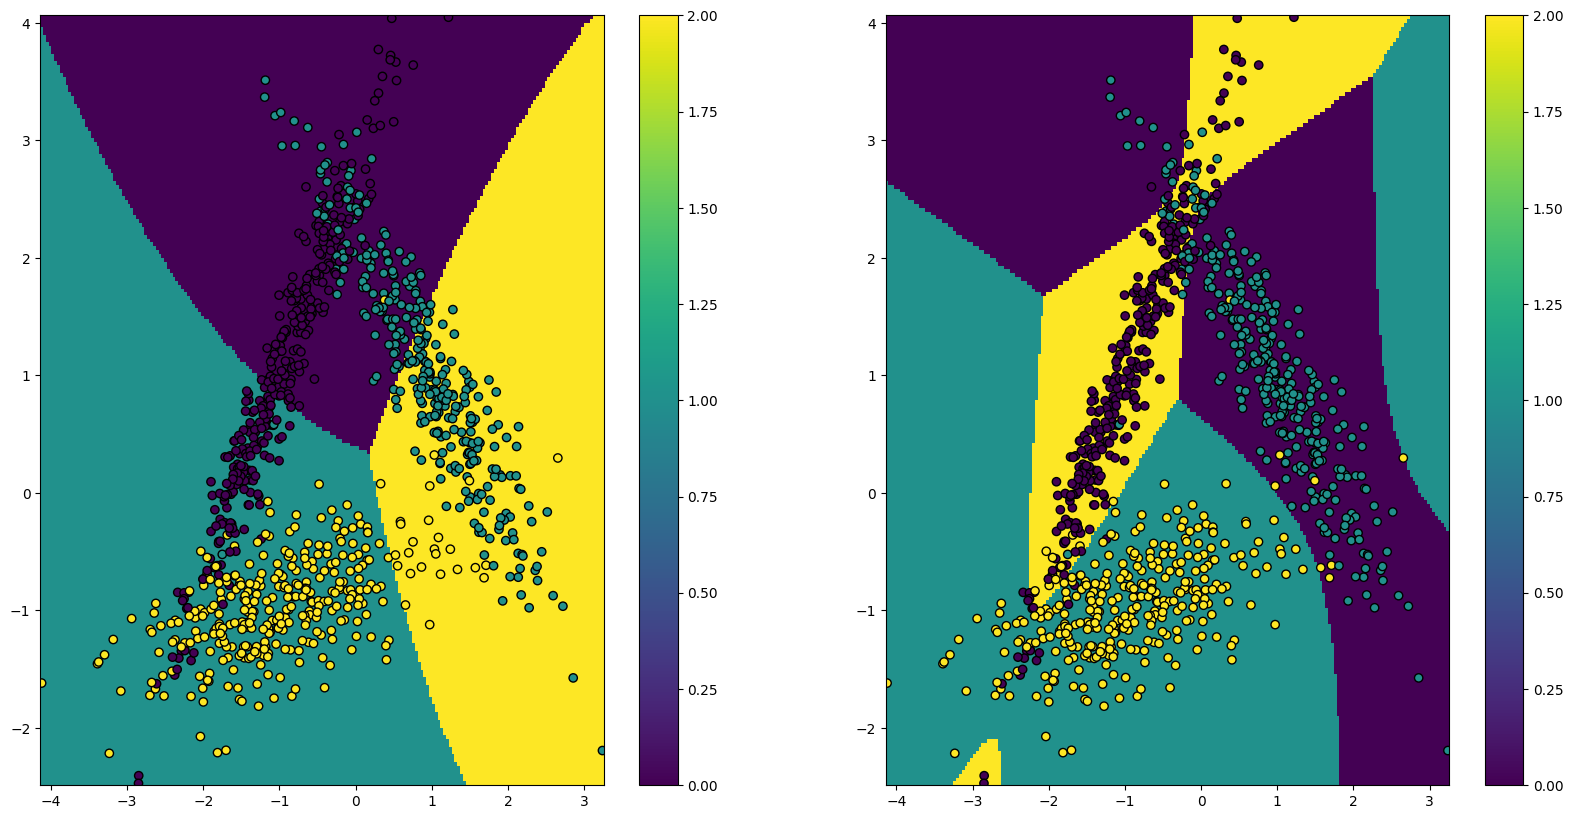

In [ ]:
#On affiche les deux partitions obetnues en personnalisant leurs représentations
#La première sera la représentation de la covariance diagonale et la seconde sera la représentation de la covariance pleine

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, z_diag, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, z_full, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.colorbar()

plt.show()